# Chapter 7 - Exercises 

1. Use `torchvision` to implement random cropping of the data.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv
from torchvision import transforms
from torchvision import datasets

import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [2]:
# some of this is copied from the notes workbook

In [3]:
data_path = 'data_unversioned/chapter07/'

In [4]:
means = np.array([0.49147, 0.48226798, 0.44678035], dtype=np.float32)
stds = np.array([0.24703224, 0.24348514, 0.26158786], dtype=np.float32)

In [5]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=True,
                                    transform=transforms.Compose([
                                        transforms.RandomCrop(24, pad_if_needed=True, padding=8, fill=(0,0,0)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=means, std=stds),]))

transformed_cifar10_val = datasets.CIFAR10(data_path, train=False, download=True,
                                    transform=transforms.Compose([
                                        transforms.RandomCrop(24, pad_if_needed=True, padding=8, fill=(0,0,0)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=means, std=stds),]))

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# taken from another notebook
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

a) how are the resulting images different from the uncropped?

> they are smaller, if i don't specify additional parameters
> 
> they are padded otherwise

b) what happens when you request the same image a second time?

> note: the order does matter
> 
> each time the image is called the cropping is randomized

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


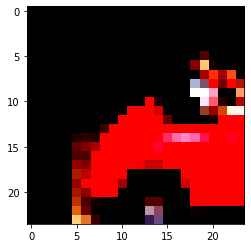

In [7]:
img, label = transformed_cifar10[99]
img, label, class_names[label]
plt.imshow(img.permute(1,2,0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


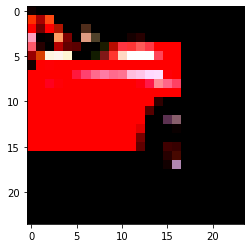

In [8]:
img, label = transformed_cifar10[99]
img, label, class_names[label]
plt.imshow(img.permute(1,2,0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


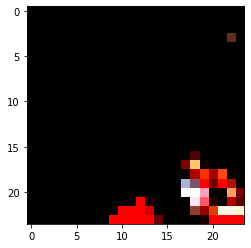

In [9]:
img, label = transformed_cifar10[99]
img, label, class_names[label]
plt.imshow(img.permute(1,2,0))
plt.show()

c) what is the result of training using randomly cropped images?

2. Switch Loss functions (perhaps MSE).

In [10]:
# get only birds and planes
label_map = {0:0, 2:1}
class_names = ['airplane', 'bird']

# build a list of tuples with (image, class_name)
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in label_map.keys()]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in label_map.keys()]
len(cifar2)

10000

In [11]:
# training loop with dataloader and minibatching
train_loader = torch.utils.data.DataLoader(cifar2, 
                                          batch_size=64,
                                          shuffle=True)

In [12]:
INPUT_SIZE = 3 * 24 * 24

In [13]:


model = nn.Sequential(
    nn.Linear(INPUT_SIZE, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
) # remove nn.LogSoftMax --> this will be combined with NLLLoss to form nn.CrossEntropyLoss

In [14]:
learning_rate = 1e-2

n_epochs = 25

In [15]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
loss_fn = nn.CrossEntropyLoss() # nn.NLLLoss() combined with nn.LogSoftMax()

In [17]:
# training loop 
for epoch in range(n_epochs):
    #for img, label in cifar2:
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1)) # keep the batch size shape and combine other dimensions, should be 64, 3072
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.501965
Epoch: 1, Loss: 0.711007
Epoch: 2, Loss: 0.408938
Epoch: 3, Loss: 0.401662
Epoch: 4, Loss: 0.331118
Epoch: 5, Loss: 0.474196
Epoch: 6, Loss: 0.312507
Epoch: 7, Loss: 0.509518
Epoch: 8, Loss: 0.490111
Epoch: 9, Loss: 0.462842
Epoch: 10, Loss: 0.490125
Epoch: 11, Loss: 0.917483
Epoch: 12, Loss: 0.288216
Epoch: 13, Loss: 0.301163
Epoch: 14, Loss: 0.529121
Epoch: 15, Loss: 0.427207
Epoch: 16, Loss: 0.444040
Epoch: 17, Loss: 0.515681
Epoch: 18, Loss: 0.575398
Epoch: 19, Loss: 0.278662
Epoch: 20, Loss: 0.375976
Epoch: 21, Loss: 0.243204
Epoch: 22, Loss: 0.420740
Epoch: 23, Loss: 0.724973
Epoch: 24, Loss: 0.452918


> now with alternative loss function

In [86]:
INPUT_SIZE = 3 * 24 * 24

In [87]:
model = nn.Sequential(
    nn.Linear(INPUT_SIZE, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
    nn.LogSoftmax(dim=1),
) # remove nn.LogSoftMax --> this will be combined with NLLLoss to form nn.CrossEntropyLoss

In [88]:
# training loop with dataloader and minibatching
train_loader = torch.utils.data.DataLoader(cifar2, 
                                          batch_size=64,
                                          shuffle=True)

In [89]:
learning_rate = 1e-2

n_epochs = 25

In [90]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [91]:
loss_fn = nn.MSELoss() # nn.CrossEntropyLoss() # nn.NLLLoss() combined with nn.LogSoftMax()

In [92]:
# training loop 
for epoch in range(n_epochs):
    #for img, label in cifar2:
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1)) # keep the batch size shape and combine other dimensions, should be 64, 3072
        loss = loss_fn(outputs.max(dim=1)[0], torch.ones(outputs.shape[0]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.041519
Epoch: 1, Loss: 1.013459
Epoch: 2, Loss: 1.010017
Epoch: 3, Loss: 1.021184
Epoch: 4, Loss: 1.004538
Epoch: 5, Loss: 1.000258
Epoch: 6, Loss: 1.002477
Epoch: 7, Loss: 1.002236
Epoch: 8, Loss: 1.000155
Epoch: 9, Loss: 1.000086
Epoch: 10, Loss: 1.000085
Epoch: 11, Loss: 1.000082
Epoch: 12, Loss: 1.001884
Epoch: 13, Loss: 1.000407
Epoch: 14, Loss: 1.000112
Epoch: 15, Loss: 1.000000
Epoch: 16, Loss: 1.000001
Epoch: 17, Loss: 1.000045
Epoch: 18, Loss: 1.000030
Epoch: 19, Loss: 1.000084
Epoch: 20, Loss: 1.000003
Epoch: 21, Loss: 1.003764
Epoch: 22, Loss: 1.000000
Epoch: 23, Loss: 1.000149
Epoch: 24, Loss: 1.000000


a) Does training behavior change?

> yes, also, the methodology changes.

3. Is it possible to reduce the capacity of the network that it stops overfitting?

> one method is to reduce the amount of epochs, for 25 epochs my validation/training accuracy is
> `74%/81%`, while for 100 epochs the same model achieved `74%/99%`
>
> let's try reducing the capacity of the network. 
> with a reduced capacity, we have `75%/99%` over 100 epochs for one network, 
> reducing the capacity to INPUT_DIM -> 512 -> 16 -> 2 over 100 epochs had `73%/91%` accuracy 
> for the validation/test datasets. 
> 
> it seems to me that the amount of epochs has more of an effect on overfitting for these models, they have too 
> many free parameters. 
> 
> Reducing further, INPUT -> 8 -> 2 over 100 epochs results in : `72%/83%` accuracy. 

In [93]:
# let's revert to the original loss and check

In [100]:
# training loop with dataloader and minibatching
train_loader = torch.utils.data.DataLoader(cifar2, 
                                          batch_size=64,
                                          shuffle=True)

INPUT_SIZE = 3 * 24 * 24

In [101]:
model = nn.Sequential(
    nn.Linear(INPUT_SIZE, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
)

In [102]:
learning_rate = 1e-2

n_epochs = 100

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss() # nn.NLLLoss() combined with nn.LogSoftMax()

In [103]:
# training loop 
for epoch in range(n_epochs):
    #for img, label in cifar2:
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1)) # keep the batch size shape and combine other dimensions, should be 64, 3072
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.519897
Epoch: 1, Loss: 0.611425
Epoch: 2, Loss: 0.788594
Epoch: 3, Loss: 0.613695
Epoch: 4, Loss: 0.539989
Epoch: 5, Loss: 0.418417
Epoch: 6, Loss: 0.382884
Epoch: 7, Loss: 0.531942
Epoch: 8, Loss: 0.534258
Epoch: 9, Loss: 0.248048
Epoch: 10, Loss: 0.387952
Epoch: 11, Loss: 0.412126
Epoch: 12, Loss: 0.282294
Epoch: 13, Loss: 0.362842
Epoch: 14, Loss: 0.711015
Epoch: 15, Loss: 0.241886
Epoch: 16, Loss: 0.402121
Epoch: 17, Loss: 0.480363
Epoch: 18, Loss: 0.377664
Epoch: 19, Loss: 0.447423
Epoch: 20, Loss: 0.513945
Epoch: 21, Loss: 0.413584
Epoch: 22, Loss: 0.506713
Epoch: 23, Loss: 0.467818
Epoch: 24, Loss: 0.310545
Epoch: 25, Loss: 0.231747
Epoch: 26, Loss: 0.450283
Epoch: 27, Loss: 0.714523
Epoch: 28, Loss: 0.240903
Epoch: 29, Loss: 0.355954
Epoch: 30, Loss: 0.356308
Epoch: 31, Loss: 0.227571
Epoch: 32, Loss: 0.374449
Epoch: 33, Loss: 0.528598
Epoch: 34, Loss: 0.448959
Epoch: 35, Loss: 0.145492
Epoch: 36, Loss: 0.377587
Epoch: 37, Loss: 0.204144
Epoch: 38, Loss: 0.209

In [104]:
# validation perfromance

# evaluation of model

val_loader = torch.utils.data.DataLoader(cifar2_val, 
                                        batch_size=64,
                                        shuffle=False)

correct, total = 0, 0

with torch.no_grad(): # do not update the gradient graph
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _ , predicted = torch.max(outputs,dim=1) # get the index of the predicted value, which is also the class label
        total += predicted.shape[0]
        correct += int((predicted == labels).sum())

print("Validation Accuracy: %f" % (correct/total))

# training performanceof model

correct, total = 0, 0

with torch.no_grad(): # do not update the gradient graph
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _ , predicted = torch.max(outputs,dim=1) # get the index of the predicted value, which is also the class label
        total += predicted.shape[0]
        correct += int((predicted == labels).sum())

print("Training Accuracy: %f" % (correct/total))

Validation Accuracy: 0.743000
Training Accuracy: 0.999200


In [114]:
# training loop with dataloader and minibatching
train_loader = torch.utils.data.DataLoader(cifar2, 
                                          batch_size=64,
                                          shuffle=True)

INPUT_SIZE = 3 * 24 * 24

In [115]:
model = nn.Sequential(
    nn.Linear(INPUT_SIZE, 8),
    nn.Tanh(),
    nn.Linear(8, 2),
)

In [116]:
learning_rate = 1e-2

n_epochs = 100

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss() # nn.NLLLoss() combined with nn.LogSoftMax()

In [117]:
# training loop 
for epoch in range(n_epochs):
    #for img, label in cifar2:
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1)) # keep the batch size shape and combine other dimensions, should be 64, 3072
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.538788
Epoch: 1, Loss: 0.729645
Epoch: 2, Loss: 0.590335
Epoch: 3, Loss: 0.582860
Epoch: 4, Loss: 0.700672
Epoch: 5, Loss: 0.999565
Epoch: 6, Loss: 0.417933
Epoch: 7, Loss: 0.340043
Epoch: 8, Loss: 0.617523
Epoch: 9, Loss: 0.478795
Epoch: 10, Loss: 0.506696
Epoch: 11, Loss: 0.727054
Epoch: 12, Loss: 0.467071
Epoch: 13, Loss: 0.626050
Epoch: 14, Loss: 0.452657
Epoch: 15, Loss: 0.513229
Epoch: 16, Loss: 0.442290
Epoch: 17, Loss: 0.446441
Epoch: 18, Loss: 0.549948
Epoch: 19, Loss: 0.399162
Epoch: 20, Loss: 0.498725
Epoch: 21, Loss: 0.310425
Epoch: 22, Loss: 0.499774
Epoch: 23, Loss: 0.457645
Epoch: 24, Loss: 0.429249
Epoch: 25, Loss: 0.384295
Epoch: 26, Loss: 0.574034
Epoch: 27, Loss: 0.390759
Epoch: 28, Loss: 0.383263
Epoch: 29, Loss: 0.481402
Epoch: 30, Loss: 0.530654
Epoch: 31, Loss: 0.479161
Epoch: 32, Loss: 0.323753
Epoch: 33, Loss: 0.607643
Epoch: 34, Loss: 0.507591
Epoch: 35, Loss: 0.730358
Epoch: 36, Loss: 0.337067
Epoch: 37, Loss: 0.404658
Epoch: 38, Loss: 0.400

In [119]:
# validation perfromance

# evaluation of model

val_loader = torch.utils.data.DataLoader(cifar2_val, 
                                        batch_size=64,
                                        shuffle=False)

correct, total = 0, 0

with torch.no_grad(): # do not update the gradient graph
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _ , predicted = torch.max(outputs,dim=1) # get the index of the predicted value, which is also the class label
        total += predicted.shape[0]
        correct += int((predicted == labels).sum())

print("Validation Accuracy: %f" % (correct/total))

# training performanceof model

correct, total = 0, 0

with torch.no_grad(): # do not update the gradient graph
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _ , predicted = torch.max(outputs,dim=1) # get the index of the predicted value, which is also the class label
        total += predicted.shape[0]
        correct += int((predicted == labels).sum())

print("Training Accuracy: %f" % (correct/total))

Validation Accuracy: 0.719500
Training Accuracy: 0.831500


a) How does the model perform on the validation set when doing so?